In [1]:
"""
This file is used to generate linearly seperable data
- Author: Patel Jainil Subhashkumar (21114072)

- Take random line y = mx + c
- Generate random points and classify them as 1 or 0
- take 5% of total points and flip their labels
"""

import csv
import random

# y = mx + c
m = int(input("Enter m: "))
c = int(input("Enter c: "))
n = int(input("Enter number of points: "))
flip = int(input("Enter percentage of points to flip: "))

# Generate 1000 points
X = []
Y = []
true_label = []

for i in range(n):
    x = random.uniform(-100, 100)
    y = random.uniform(-100, 100)
    X.append(x)
    Y.append(y)
    if y > m*x + c:
        true_label.append(1)
    elif y < m*x + c:
        true_label.append(-1)
    else:
        true_label.append(0)

# Flip labels
for i in range(int(n*flip/100)):
    if true_label[i] == -1:
        true_label[i] = 1
    else:
        true_label[i] = -1

# Write to csv file
with open('./nonLinearSeperableData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(n):
        writer.writerow([X[i], Y[i], true_label[i]])
        
print("Data generated and saved in nonLinearSeperableData.csv")

Data generated and saved in nonLinearSeperableData.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
# Read the X from the csv file
dataFrame = pd.read_csv('./nonLinearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
ones_column = np.ones((X.shape[0], 1))
X_with_ones = np.hstack((X, ones_column))
X = X_with_ones
Y = np.array(dataFrame['y'])

          x1         x2  y
0   8.998922 -94.764104  1
1 -37.241446  99.808190 -1
2 -51.589157 -97.781732 -1
3  43.929263  -2.069607  1
4  11.934330 -45.164867  1


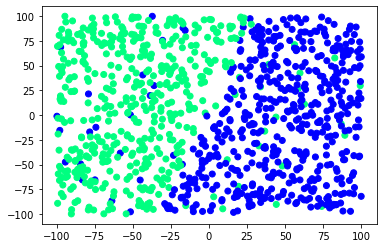

In [5]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [6]:
# Perceptron Learning Algorithm (PLA) for Linear Seperable X

numFeatures = 2
weights = np.zeros(numFeatures+1)
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
maxIterations = 1000
error = []

while not done and maxIterations > 0:
    done = True
    err = 0
    for i in range(len(X)):
        y_pred = np.sign(np.dot(X[i], weights))
        if y_pred != Y[i]:
            weights += learningRate*(Y[i]-y_pred) * X[i]
            done = False
            err += 1
    error.append(err/len(X))

    maxIterations -= 1

print("Weights: ", weights)
print("Error: ", error)

Dimension of weights:  (3,)
Dimension of X[0]:  (1000, 3)
Dimension of Y[0]:  (1000,)
Weights:  [ -93.00949702   24.23907327 -186.2       ]
Error:  [0.044, 0.042, 0.036, 0.041, 0.044, 0.03, 0.027, 0.029, 0.011, 0.026, 0.024, 0.048, 0.031, 0.031, 0.022, 0.038, 0.041, 0.034, 0.032, 0.035, 0.03, 0.038, 0.039, 0.045, 0.038, 0.036, 0.044, 0.04, 0.037, 0.038, 0.032, 0.042, 0.041, 0.037, 0.042, 0.044, 0.041, 0.036, 0.038, 0.045, 0.037, 0.04, 0.031, 0.034, 0.035, 0.044, 0.047, 0.04, 0.033, 0.045, 0.048, 0.042, 0.043, 0.03, 0.041, 0.044, 0.042, 0.038, 0.028, 0.036, 0.033, 0.047, 0.03, 0.049, 0.026, 0.04, 0.03, 0.049, 0.03, 0.026, 0.025, 0.051, 0.033, 0.041, 0.033, 0.039, 0.033, 0.022, 0.039, 0.046, 0.033, 0.031, 0.049, 0.049, 0.033, 0.028, 0.026, 0.026, 0.041, 0.033, 0.035, 0.032, 0.042, 0.049, 0.049, 0.033, 0.028, 0.026, 0.042, 0.033, 0.035, 0.032, 0.051, 0.032, 0.03, 0.047, 0.043, 0.044, 0.033, 0.041, 0.033, 0.035, 0.032, 0.051, 0.034, 0.034, 0.047, 0.038, 0.035, 0.039, 0.04, 0.046, 0.049, 0.

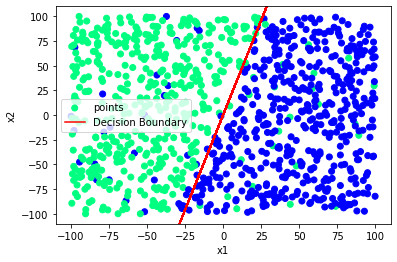

In [7]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['points', 'Decision Boundary'])
plt.show()

Text(0.5, 1.0, 'Error Plot')

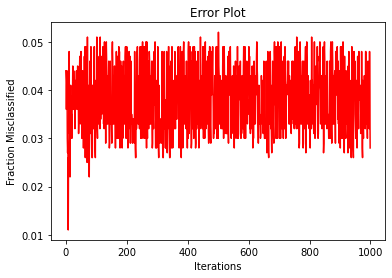

In [8]:
# Error plot for certain number of iterations
plt.plot(range(len(error)), error, 'r-', label='Misclassified')
plt.xlabel('Iterations')
plt.ylabel('Fraction Misclassified')
plt.title('Error Plot')